In [1]:
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using Missings
using Dates

In [2]:
df = CSV.read("Square.csv")
feature_names = names(df)
for i in 1:11
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	Date			String
2	GSPC_adj_price			String
3	GSPC_log_ret			Float64
4	BTC_adj_price			Float64
5	BTC_log_ret			Float64
6	NVDA_adj_price			Float64
7	NVDA_log_ret			Float64
8	Gold_adj_price			Float64
9	Gold_log_ret			Float64
10	US_inflation_rate			Float64
11	3_month_LIBOR			Float64


In [3]:
df

,Date,GSPC_adj_price,GSPC_log_ret,BTC_adj_price,BTC_log_ret,NVDA_adj_price
,String,String,Float64,Float64,Float64,Float64
1,4/30/13,"1,597.57",0.0,139.0,0.0,12.8508
2,5/1/13,"1,582.70",-0.00935147,116.99,-0.172385,12.7388
3,5/2/13,"1,597.59",0.009364,105.21,-0.10613,12.8881
4,5/3/13,"1,614.42",0.0104796,97.75,-0.0735452,12.9441
5,5/6/13,"1,617.50",0.00190596,112.3,0.138761,12.9068
6,5/7/13,"1,625.96",0.00521664,111.5,-0.00714927,12.7388
7,5/8/13,"1,632.69",0.00413054,113.57,0.0183948,12.9721
8,5/9/13,"1,626.67",-0.00369392,112.67,-0.00795619,12.9814
9,5/10/13,"1,633.70",0.00431234,117.2,0.0394187,13.5694


In [4]:
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float (generic function with 1 method)

In [5]:
# GSPC_a_p = convert(Matrix, string_to_float.(df[:, :GSPC_adj_price]))
gspc_a_p_s_raw = df[:, :GSPC_adj_price];
gspc_a_p_s = [replace(s, "," => "") for s in gspc_a_p_s_raw]
gspc_a_p = string_to_float.(gspc_a_p_s);
btc_a_p = df[:, :BTC_adj_price];
nvda_a_p = df[:, :NVDA_adj_price];
gold_a_p = df[:, :Gold_adj_price];
date_string = df[:, :Date];

In [29]:
date = [Dates.DateTime(ds, "mm/dd/yyyy") + Dates.Year(2000) for ds in date_string];
ticks = [date[i] for i in 1:160:length(date)];

In [72]:
p_btc_p = plot(date, btc_a_p, 
    label = "BTC Price", 
    ylabel = "BTC (USD)",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:topleft,
    color = "black",
    # size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(8),
    legendfont=font(10),
    guidefontsize = font(10),
    grid = false,
    )
savefig("BTC_price")

In [50]:
p_gold_p = plot(date, gold_a_p, 
    label = "Gold Price", 
    ylabel = "Gold Price (USD/Ounce)",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:topleft,
    color = "black",
    # size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(10),
    legendfont=font(10),
    guidefontsize = font(12),
    grid = false
    )
savefig("Gold_price")

In [51]:
p_nvda_p = plot(date, nvda_a_p, 
    label = "NVDA Price", 
    ylabel = "NVDA Price (USD)",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:topleft,
    color = "black",
#     size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(10),
    legendfont=font(10),
    guidefontsize = font(12),
    grid = false
    )
savefig("NVDA_price")

In [52]:
p_gspc_p = plot(date, gspc_a_p, 
    label = "GSPC Price", 
    ylabel = "GSPC Price (USD)",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:topleft,
    color = "black",
#     size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(10),
    legendfont=font(10),
    guidefontsize = font(12),
    grid = false
    )
savefig("GSPC_price")

In [81]:
using Plots
#pyplot()

btc_l_r = df[:, :BTC_log_ret];
gspc_l_r = df[:, :GSPC_log_ret];
nvda_l_r = df[:, :NVDA_log_ret];
gold_l_r = df[:, :Gold_log_ret];

# see issue #186... this is the standard histogram call
# our goal is to use the same edges for both series
# histogram(Any[x1, x2], line=(0,0,:green), fillcolor=[:red :black], fillalpha=0.2, bins = 20)
p1 = histogram(btc_l_r, line=(0,:black), fillcolor=[:red], fillalpha=0.2, label = "BTC_log_ret", dpi = 600,
    bins = 60, xlims = (-0.3, 0.3),
    xtickfont = font(12),
    ytickfont = font(12),
    legendfont=font(8));
p2 = histogram(gspc_l_r, line=(0,:black), fillcolor=[:black], fillalpha=0.2, label = "GSPC_log_ret", dpi = 600,
    bins = 5, xlims = (-0.3, 0.3),
    xtickfont = font(12),
    ytickfont = font(12),
    legendfont=font(8));
p3 = histogram(nvda_l_r, line=(0,:black), fillcolor=[:green], fillalpha=0.2, label = "NVDA_log_ret", dpi = 600,
    bins = 25, xlims = (-0.3, 0.3),
    xtickfont = font(12),
    ytickfont = font(12),
    legendfont=font(8));
p4 = histogram(gold_l_r, line=(0,:black), fillcolor=[:blue], fillalpha=0.2, label = "Gold_log_ret", dpi = 600,
    bins = 5, xlims = (-0.3, 0.3),
    xtickfont = font(12),
    ytickfont = font(12),
    legendfont=font(8));
plot(p1,p2,p3,p4,layout=(2,2), size = (1200, 500))
savefig("return_hists")

In [12]:
us_i_r = df[:, :US_inflation_rate];
three_month_LIBOR = df[:, Symbol("3_month_LIBOR")];

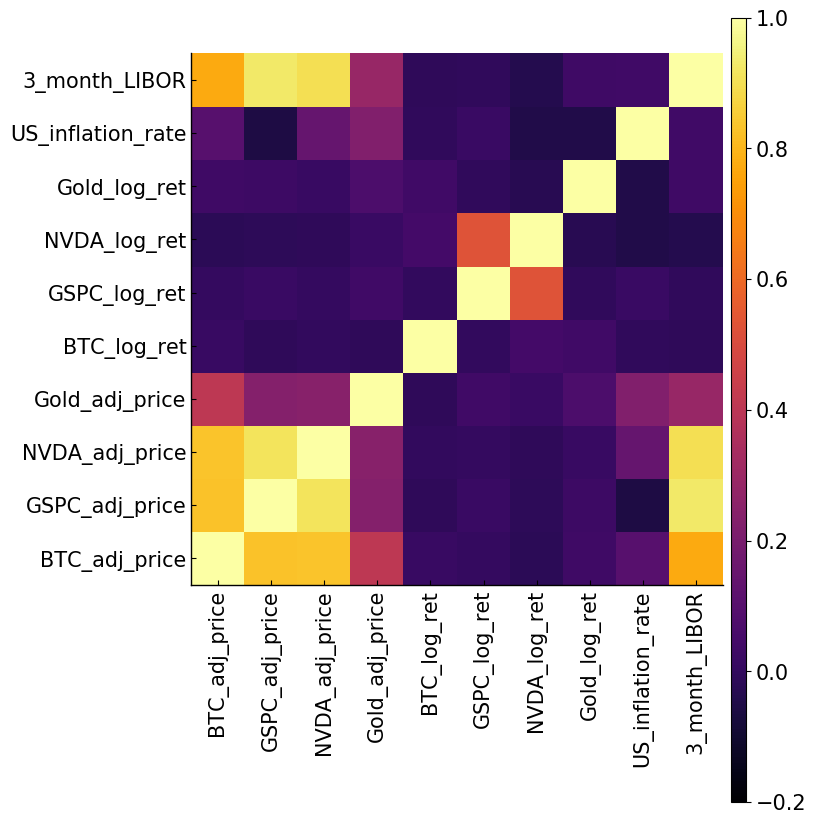

In [52]:
pyplot()
data = [btc_a_p gspc_a_p nvda_a_p gold_a_p btc_l_r gspc_l_r nvda_l_r gold_l_r us_i_r three_month_LIBOR];
vars = ["BTC_adj_price", "GSPC_adj_price", "NVDA_adj_price", "Gold_adj_price", "BTC_log_ret", "GSPC_log_ret", 
    "NVDA_log_ret", "Gold_log_ret", "US_inflation_rate", "3_month_LIBOR"];
corrmatrix = cor(data)
heatmap(vars, vars, corrmatrix, grid = false, aspect_ratio=1, clim = (-0.2,1), 
    xrotation=90, 
    size = (800, 800), xtickfont = font(15), ytickfont = font(15))
savefig("heatmap");

In [54]:
us_i_r = df[:, :US_inflation_rate];

p_inflat_r = plot(date, us_i_r, 
    label = "US Inflation Rate",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:bottomleft,
    color = "black",
#     size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(10),
    legendfont=font(10),
    guidefontsize = font(12)
    )
savefig("US_inflation_rate")

In [55]:
three_m_l = df[:, Symbol("3_month_LIBOR")];

p_3_l = plot(date, three_m_l, 
    label = "3 Month LIBOR",
    xticks = (Dates.value.(ticks), Date.(ticks)),
    xrotation=45,
    dpi = 600,
    legend=:topleft,
    color = "black",
#     size = (800, 350),
    xtickfont = font(10),
    ytickfont = font(10),
    legendfont=font(10),
    guidefontsize = font(12)
    )
savefig("3_month_LIBOR")

In [76]:
plot(p_btc_p, p_gspc_p, p_nvda_p, p_gold_p, layout=(2,2), size = (1200, 500))
savefig("fig1to4")